In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [ ]:
data = pd.read_csv('/content/500_Person_Gender_Height_Weight_Index.csv')
data_visual = pd.read_csv('/content/500_Person_Gender_Height_Weight_Index.csv')

In [ ]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,2
1,Male,189,87,1
2,Female,185,110,2
3,Female,195,104,2
4,Male,149,61,2


In [ ]:
data.shape

(500, 4)

In [ ]:
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Wasting'
    elif x['Index'] == 1:
        return 'Normal'
    elif x['Index'] == 2:
        return 'Obesity'
data_visual['Status'] = data_visual.apply(convert_status_to_description,axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Status
0,Male,174,96,2,Obesity
1,Male,189,87,1,Normal
2,Female,185,110,2,Obesity
3,Female,195,104,2,Obesity
4,Male,149,61,2,Obesity


In [ ]:
def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
data_visual['gender_lbl'] = data_visual.apply(convert_gender_to_label,axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,2,Obesity,1
1,Male,189,87,1,Normal,1
2,Female,185,110,2,Obesity,0
3,Female,195,104,2,Obesity,0
4,Male,149,61,2,Obesity,1


/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


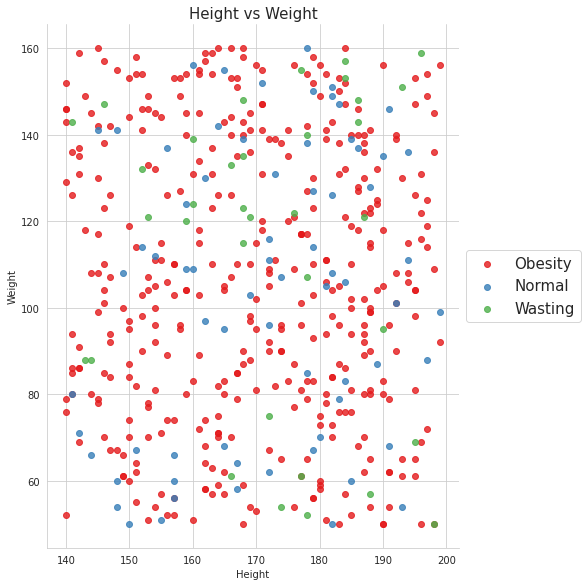

In [ ]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='Height', y='Weight', data=data_visual, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

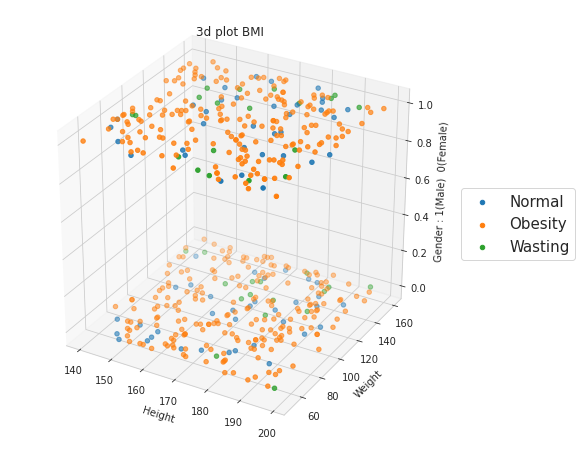

In [ ]:
groups = data_visual.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(data_visual['Height'],data_visual['Weight'] , data_visual['gender_lbl'], 
#            c=data_visual['Index'],
#            cmap=matplotlib.colors.ListedColormap(colors))


for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)')
ax.set_title('3d plot BMI')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

In [ ]:
people = data_visual['Gender'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(people))
people.head()

<class 'pandas.core.series.Series'>


Female    255
Male      245
Name: Gender, dtype: int64

In [ ]:
categories = data_visual['Status'].value_counts() 
categories

Obesity    395
Normal      70
Wasting     35
Name: Status, dtype: int64

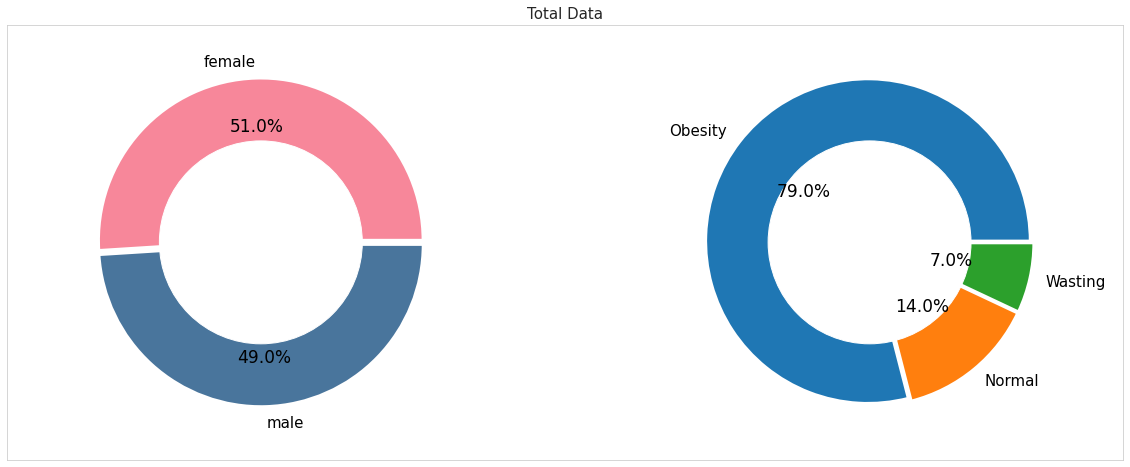

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Obesity','Normal','Wasting'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle)

In [ ]:
data_visual_male = data_visual[data_visual['Gender']=='Male']
data_visual_male.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,2,Obesity,1
1,Male,189,87,1,Normal,1
4,Male,149,61,2,Obesity,1
5,Male,189,104,2,Obesity,1
6,Male,147,92,2,Obesity,1


In [ ]:
data_visual_male_categories = data_visual_male['Status'].value_counts()
data_visual_male_categories

Obesity    191
Normal      35
Wasting     19
Name: Status, dtype: int64

In [ ]:
data_visual_female = data_visual[data_visual['Gender']=='Female']
data_visual_female.head()

,Gender,Height,Weight,Index,Status,gender_lbl
2,Female,185,110,2,Obesity,0
3,Female,195,104,2,Obesity,0
9,Female,169,103,1,Normal,0
11,Female,159,80,2,Obesity,0
12,Female,192,101,1,Normal,0


In [ ]:
data_visual_female_categories = data_visual_female['Status'].value_counts()
data_visual_female_categories

Obesity    204
Normal      35
Wasting     16
Name: Status, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
lbl_enc = LabelEncoder()
data.iloc[:,0] = lbl_enc.fit_transform(data.iloc[:,0])
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')

# one_hot_enc_for_gender = OneHotEncoder(categorical_features = [0])
data = np.array(columnTransformer.fit_transform(data), dtype = np.float64)
# X = X[:, 1:]
# data = columnTransformer.fit_transform(data).toarray()

In [ ]:
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4
0,0.0,1.0,174.0,96.0,2.0
1,0.0,1.0,189.0,87.0,1.0
2,1.0,0.0,185.0,110.0,2.0
3,1.0,0.0,195.0,104.0,2.0
4,0.0,1.0,149.0,61.0,2.0


In [ ]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
df.iloc[:,0:-1] = std_sc.fit_transform(df.iloc[:,0:-1])

In [ ]:
df.head()

,0,1,2,3,4
0,-1.020204,1.020204,0.247939,-0.309117,2.0
1,-1.020204,1.020204,1.164872,-0.587322,1.0
2,0.980196,-0.980196,0.920357,0.123647,2.0
3,0.980196,-0.980196,1.531645,-0.061823,2.0
4,-1.020204,1.020204,-1.280283,-1.391027,2.0


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [ ]:
print(type(X_train))
X_train.head()

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3
107,-1.020204,1.020204,-0.668995,1.483762
336,0.980196,-0.980196,-0.179963,1.452850
71,-1.020204,1.020204,0.492454,0.340029
474,0.980196,-0.980196,-0.179963,-0.834616
6,-1.020204,1.020204,-1.402541,-0.432764


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[ 0,  0,  7],
       [ 0,  0, 16],
       [ 2,  1, 74]])

In [ ]:
from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(y_test, y_pred_rfc)
rfc_acc*100

74.0

In [ ]:
def trees_in_forest_vs_acc(trees, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    rfc = RandomForestClassifier(n_estimators=trees, criterion='entropy', random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [ ]:
trees_list_for_randomForest = [100, 200, 300, 500, 700, 1000]
acc_scores_for_trees_RFC = []
for x in trees_list_for_randomForest:
    acc_scores_for_trees_RFC.append(trees_in_forest_vs_acc(x))
acc_scores_for_trees_RFC

[0.72, 0.74, 0.73, 0.74, 0.74, 0.75]

,No. of trees in Forest,Accuracy scores for Random Forest Classification
0,100,0.72
1,200,0.74
2,300,0.73
3,500,0.74
4,700,0.74


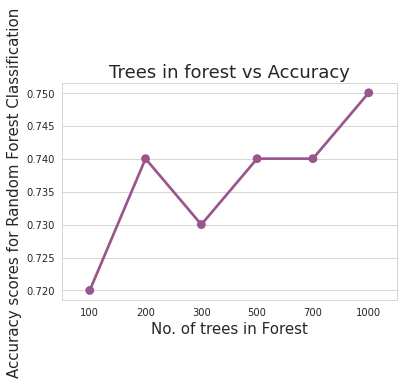

In [ ]:
tree_vs_acc = pd.DataFrame({'No. of trees in Forest':trees_list_for_randomForest,
              'Accuracy scores for Random Forest Classification':acc_scores_for_trees_RFC})


sns.pointplot(x='No. of trees in Forest',y='Accuracy scores for Random Forest Classification',data=tree_vs_acc,color='#98568d')

plt.title('Trees in forest vs Accuracy',size=18)
plt.xlabel('No. of trees in Forest',size=15)
plt.ylabel('Accuracy scores for Random Forest Classification',size=15)


tree_vs_acc.head()

In [ ]:

def health_test(gender, height, weight):
    '''Input gender as Male/Female, height in cm, weight in Kg'''
    individual_data_dict = {'Gender':gender, 'Height':height, 'Weight':weight}   
    individual_data = pd.DataFrame(data = individual_data_dict, index=[0])
    individual_data.iloc[:,0] = lbl_enc.transform(individual_data.iloc[:,0])
    individual_data = columnTransformer.transform(individual_data).toarray()
    df = pd.DataFrame(individual_data)
    df.iloc[:,:] = std_sc.transform(df.iloc[:,:])
    y_pred = rfc.predict(individual_data)
    if x['Index'] == 0:
        return 'Wasting'
    elif x['Index'] == 1:
        return 'Normal'
    elif x['Index'] == 2:
        return 'Obesity'

In [ ]:
sample_person = ['Female',141,136]
sample_result = health_test(*sample_person)
sample_result